## 文本摘要简述


随着互联网产生的文本数据越来越多，文本信息过载问题日益严重，对各类文本进行一个“降 维”处理显得非常必要，文本摘要便是其中一个重要的手段。文本摘要旨在将文本或文本集合转换为包含关键信息的简短摘要。文本摘要按照输入类型可分为单文档摘要和多文档摘要。单文档摘要从给定的一个文档中生成摘要，多文档摘要从给定的一组主题相关的文档中生成摘要。按照输出类型可分为抽取式摘要和生成式摘要。抽取式摘要从源文档中抽取关键句和关键词组成摘要，摘要全部来源于原文。生成式摘要根据原文，允许生成新的词语、短语来组成摘要。按照有无监督数据可以分为有监督摘要和无监督摘要。本文主要关注单文档、有监督、抽取式、生成式摘要


在某一时刻，你可能需要对一份文件进行摘要，无论是研究文章、财务收益报告，还是一连串的电子邮件。如果你仔细想想，这需要一系列的能力，比如理解长篇大论，对内容进行推理，并制作出流畅的文本，将原始文件的主要议题纳入其中。此外，准确地摘要一篇新闻文章与摘要一份法律合同有很大的不同，所以能够做到这一点需要有复杂的领域概括能力。由于这些原因，文本摘要对于神经语言模型，包括Transformers来说是一项困难的任务。尽管有这些挑战，文本摘要还是为领域专家提供了大幅加快工作流程的前景，并被企业用来浓缩内部知识、摘要合同、为社交媒体发布自动生成内容等等。


### 抽取式摘要
抽取式方法从原文中选取关键词、关键句组成摘要。这种方法天然的在语法、句法上错误率低，保证了一定的效果。传统的抽取式摘要方法使用图方法、聚类等方式完成无监督摘要。目前流行的基于神经网络的抽取式摘要往往将问题建模为序列标注和句子排序两类任务。下面首先介绍传统的抽取式摘要方法，接着简述基于神经网络的抽取式摘要方法。

- 传统方法

一般来说，作者常常会在标题和文章开始就表明主题，因此最简单的方法就是抽取文章中的前几句作为摘要。常用的方法为 Lead-3，即抽取文章的前三句作为文章的摘要。Lead-3 方法虽然简单直接，但却是非常有效的方法。

- TextRank
TextRank 算法仿照 PageRank，将句子作为节点，使用句子间相似度，构造无向有权边。使用边上的权值迭代更新节点值，最后选取 N 个得分最高的节点，作为摘要。

- 聚类
将文章中的句子视为一个点，按照聚类的方式完成摘要。例如 Padmakumar and Saran [11] 将文章中的句子使用 Skip thought vectors 和 Paragram embeddings 两种方式进行编码，得到句子级别的向量表示，再使用 K 均值聚类和 Mean-Shift 聚类进行句子聚类，得到 N 个类别。最后从每个类别中，选择距离质心最近的句子，得到 N 个句子，作为最终摘要。

- 序列标注方式
抽取式摘要可以建模为序列标注任务进行处理，其核心想法是：为原文中的每一个句子打一个二分类标签（0 或 1），0 代表该句不属于摘要，1 代表该句属于摘要。最终摘要由所有标签为 1 的句子构成。

- 序列标注摘要基本框架
将文本摘要建模为序列标注任务的关键在于获得句子的表示，即将句子编码为一个向量，根据该向量进行二分类任务，例如 AAAI17 中，Nallapati 等人[10]的工作，使用双向 GRU 分别建模词语级别和句子级别的表示。其模型 SummaRuNNer 如图 1所示。蓝色部分为词语级别表示，红色部分为句子级别表示，对于每一个句子表示，有一个 0、1 标签输出，指示其是否是摘要。

![](https://image.jiqizhixin.com/uploads/editor/29c33231-37a3-4ebb-87d0-3281e87e4855/640.png)


### 生成式摘要
抽取式摘要在语法、句法上有一定的保证，但是也面临了一定的问题，例如：内容选择错误、连贯性差、灵活性差等问题。生成式摘要允许摘要中包含新的词语或短语，灵活性高，随着近几年神经网络模型的发展，序列到序列（Seq2Seq）模型被广泛的用于生成式摘要任务，并取得一定的成果。

仅使用 Seq2Seq 来完成生成式摘要存在如下问题：（1）未登录词问题（OOV），（2）生成重复。现在被广泛应用于生成式摘要的框架由 See 等人[13]在 ACL17 中提出，在基于注意力机制的 Seq2Seq 基础上增加了 Copy 和 Coverage 机制，有效的缓解了上述问题。其模型 pointer-generator 网络如图 4所示。

![](https://image.jiqizhixin.com/uploads/editor/064c4840-7030-4108-af9b-8f4953939439/640.png)




本质: 文本摘要任务就是利用模型自动完成关键信息的抽取, 文本核心语义的概括, 用一个简短的结果文本来表达和原文本同样的意思, 并传达等效的信息.
- 中学语文课的中心思想概括.
- 新浪体育上的体育新闻短评.
- 今日头条上的每日重要新闻概览.
- 英语考试中的概括某段落信息的选择题.


为了帮助你了解其中的挑战，本章将探讨我们如何利用预训练的Transformers来摘要文档。摘要是一个经典的序列到序列（seq2seq）任务，有一个输入文本和一个目标文本。正如我们在第1章中所看到的，这正是编码器-解码器Transformers的优势所在。

在这一章中，我们将建立自己的编码器-解码器模型，将几个人之间的对话浓缩成一个简洁的摘要。但在这之前，让我们先来看看摘要的典型数据集之一：CNN/DailyMail语料库。


[文本摘要综述（一）——抽取式摘要](https://zhuanlan.zhihu.com/p/80294089)


## CNN/DailyMail 数据集

[CNN/Daily Mail QA领域第一个大型的有监督数据集](https://zhuanlan.zhihu.com/p/137689404)

CNN/Daily Mail（简称CNN/DM）作为单文本摘要语料库，每篇摘要包含多个摘要句。数据集最初是从美国有限新闻网（CNN）和每日邮报网（Daily Mail）收集的约100万条新闻数据作为机器阅读理解语料库。后来进行简单改动，形成用于单文本生成式摘要的语料库。将每篇新闻的要点按原文中出现的顺序组成多句的摘要，每个要点看成是一个句子。

数据说明
用于单文本摘要的CNN/DM数据集规模：

训练集大小： 286817
验证集大小： 13368
测试集大小： 11487
训练集中平均摘要句子数： 3.72
数据来源
https://cs.nyu.edu/~kcho/DMQA/

问题描述
数据集适用于机器阅读理解、文本自动摘要等自然语言处理相关问题



几个CNN/DM数据集的地址：

- 最初版本的CNN/DM：https://cs.nyu.edu/~kcho/DMQA/
- 非匿名数据集的代码：https://github.com/abisee/cnn-dailymail 
- 处理完的数据：https://github.com/JafferWilson/Process-Data-of-CNN-DailyMail


CNN/DailyMail数据集由大约300,000对新闻文章及其相应的摘要组成，这些摘要由CNN和DailyMail在其文章中附加的要点组成。该数据集的一个重要方面是，摘要是抽象的，而不是摘录的，这意味着它们由新的句子而不是简单的摘录组成。该数据集可在Hub上找到；我们将使用3.0.0版本，这是一个为摘要而设置的非匿名版本。我们可以用类似于分割的方式来选择版本，我们在第四章中看到，用版本关键词来选择。

因此，让我们潜入其中，看一看：

In [ ]:
#hide_output
from datasets import load_dataset

dataset = load_dataset("cnn_dailymail", version="3.0.0")
print(f"Features: {dataset['train'].column_names}")

该数据集有三列：文章，其中包含新闻文章，亮点与摘要，以及唯一标识每篇文章的ID。我们来看看一篇文章的摘录：

In [ ]:
sample = dataset["train"][1]
print(f"""
Article (excerpt of 500 characters, total length: {len(sample["article"])}):
""")
print(sample["article"][:500])
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])


Article (excerpt of 500 characters, total length: 3192):

(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his
third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m
relay. The fastest man in the world charged clear of United States rival Justin
Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel
Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds
with Canada taking the bronze after Britain were disqualified for a faulty
handover. The 26-year-old Bolt has n

Summary (length: 180):
Usain Bolt wins third gold of world championship .
Anchors Jamaica to 4x100m relay victory .
Eighth gold at the championships for Bolt .
Jamaica double up in women's 4x100m relay .


我们看到，与目标摘要相比，文章可能非常长；在这个特定的案例中，差异是17倍。长文章对大多数Transformers模型构成了挑战，因为上下文的大小通常被限制在1000个左右，这相当于几个段落的文字。处理这个问题的标准但粗略的方法是简单地截断超出模型上下文规模的文本。显然，在文本的结尾处可能会有重要的摘要信息，但是现在我们需要忍受模型结构的这种限制。

## 文本摘要流水线
让我们先从质量上看一下前面的例子的输出，看看几个最流行的Transformers模型在摘要上的表现。尽管我们要探索的模型架构有不同的最大输入规模，但我们把输入文本限制为2000个字符，以便所有模型都有相同的输入，从而使输出更具有可比性：

In [ ]:
sample_text = dataset["train"][1]["article"][:2000]
# We'll collect the generated summaries of each model in a dictionary
summaries = {}

摘要中的一个惯例是用一个换行来分隔摘要句子。我们可以在每个句号之后添加一个换行符，但是对于像 "U.S. "或 "U.N. "这样的字符串，这种简单的启发式方法会失败。自然语言工具包（NLTK）软件包包括一个更复杂的算法，可以从缩写中出现的标点符号中区分出句子的结束：

In [ ]:
#hide_output
import nltk
from nltk.tokenize import sent_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /home/leandro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
string = "The U.S. are a country. The U.N. is an organization."
sent_tokenize(string)

['The U.S. are a country.', 'The U.N. is an organization.']

在下面的章节中，我们将加载几个大型模型。如果你的内存用完了，你可以用较小的模型（如 "gpt"、"t5small"）来替换大型模型，或者跳过本节，跳到 "在CNN/DailyMail数据集上评估PEGASUS"。

### 文本摘要流水线
文本摘要新闻文章的一个常见基线是简单地提取文章的前三句。有了NLTK的句子标记器，我们可以很容易地实现这样一个基线：

In [ ]:
def three_sentence_summary(text):
    return "\n".join(sent_tokenize(text)[:3])

In [ ]:
summaries["baseline"] = three_sentence_summary(sample_text)

### GPT-2
"Language Models are Unsupervised Multitask Learners".

https://d4mucfpksywv.cloudfront.net/better-language-models/language_models_are_unsupervised_multitask_learners.pdf


我们已经在第5章中看到GPT-2如何在给定的提示下生成文本。该模型的一个令人惊讶的特点是，我们也可以用它来生成摘要，只需在输入文本的末尾加上 "TL;DR"。"TL;DR"的表达方式在Reddit等平台上经常被用来表示一个长帖子的简短版本。我们将通过使用Transformers中的pipeline()函数重新创建原始论文的程序来开始我们的文本摘要实验。我们创建一个文本生成流水线并加载大型GPT-2模型：



In [ ]:
#hide_output
from transformers import pipeline, set_seed

set_seed(42)
pipe = pipeline("text-generation", model="gpt2-xl")
gpt2_query = sample_text + "\nTL;DR:\n"
pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True)
summaries["gpt2"] = "\n".join(
    sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))

在这里，我们只是通过对输入的查询进行切片来存储生成的文本的摘要，并将结果保存在Python字典中，供以后比较。

### T5

Exploring the Limits of Transfer Learning with a Unified Text-to-Text Transformer
https://arxiv.org/abs/1910.10683

接下来我们来试试T5预训练模型。正如我们在第三章中所看到的，这个模型的开发者对NLP中的迁移学习进行了全面的研究，发现他们可以通过将所有任务制定为文本到文本的任务来创建一个通用的转化器架构。T5模型是在无监督数据（重建被掩盖的词）和监督数据的混合体上进行训练的，包括文本摘要在内的几个任务。因此，这些模型可以直接用于执行文本摘要，而不需要通过使用预训练期间的相同提示进行微调。在这个框架中，模型文本摘要文档的输入格式是 "summaryize:

"，而对于翻译来说，它看起来像 "把英语翻译成德语："。如图6-1所示，这使得T5的功能非常全面，可以用一个模型解决很多任务。
我们可以用pipeline()函数直接加载T5进行文本摘要，它还负责以文本到文本的格式对输入进行格式化，所以我们不需要在输入前加上 "summaryize"。

In [ ]:
#hide_output
pipe = pipeline("summarization", model="t5-large")
pipe_out = pipe(sample_text)
summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

### BART

全称：Denoising Sequence-to-Sequence Pre-training for Natural Language Generation, Translation, and Comprehension。BART来源于Bidirectional and Auto-Regressive Transformers


https://arxiv.org/abs/1910.13461


BART也使用编码器-解码器结构，并被训练为重建被破坏的输入。它结合了BERT和GPT-2的预训练方案。我们将使用facebook/bart-large-ccn 模型，它已经在CNN/DailyMail数据集上进行了专门的微调:

Bart和T5在预训练时都将文本span用掩码替换， 然后让模型学着去重建原始文档。（PS.这里进行了简化， 这两篇论文都对许多不同的预训练任务进行了实验，发现这一方法表现良好。T5使用replace corrupted spans任务， 没有进行mask操作，而是选择了随机token进行替换。）

![](https://pic2.zhimg.com/80/v2-869ae8f65a9f1be753a51ee2f9011f31_720w.jpg)


在上述示例中，原始文档为A B C D E。在编码之前将文本[C，D]屏蔽掉，又在B之前插入一个额外的掩码，然后将损坏的文档A _ B _ E作为编码器的输入。解码器必须使用编码器的输出和先前未损坏的标记来重建原始文档。

[BART原理简介与代码实战](https://zhuanlan.zhihu.com/p/121788986)

In [ ]:
#hide_output
pipe = pipeline("summarization", model="facebook/bart-large-cnn")
pipe_out = pipe(sample_text)
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

### PEGASUS

PEGASUS: Pre-training with Extracted Gap-sentences for Abstractive Summarization


与BART一样，PEGASUS是一个编码器-解码器转化器。如图6-2所示，它的预训练目标是预测多句子文本中的遮蔽句子。作者认为，预训练目标越接近下游任务，其效果就越好。为了找到一个比一般语言建模更接近文本摘要的预训练目标，他们在一个非常大的语料库中自动识别了包含其周围段落大部分内容的句子（使用文本摘要评价指标作为内容重叠的启发式方法），并预训练了PEGASUS模型来重建这些句子，从而获得了一个最先进的文本摘要模型。


动机和核心问题
- 很少有关于系统评估文本摘要的不同方法和数据集
- 基于 Transformer 的 Seq2Seq 预训练在文本生成中的成功

本文的贡献如下：

- 提出新的文本摘要自监督预训练目标：gap-sentences generation（GSG）
- 在大量下游摘要任务中进行评估
- 在少量数据上精调取得很好的效果
- 对结果进行了人工评估

模型和算法
- 依然是基于 Transformer 的架构，不过在以下方面做了调整。

GSG

- PEGASUS 选择了 mask 掉整个句子，然后将 mask 掉的句子重建为摘要。
- 因为是摘要任务，所以目标句子选择时基于重要性而不是随机选取。

三种选择句子的方式：

- 随机（纯粹做实验的）
- 前 m 个（也是做实验的）
- 基于重要性，评估方式：
    Ind：独立的 ROUGE1-F1
    Seq：连续选择后贪婪最大化的 ROUGE1-F1

[PEGASUS 论文笔记](https://yam.gift/2020/09/13/Paper/2020-09-13-PEGASUS/)

In [ ]:
#hide_output
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail")
pipe_out = pipe(sample_text)
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

## 比较不同的摘要效果
现在，我们已经用四个不同的模型生成了摘要，让我们来比较一下结果。请记住，一个模型根本没有在数据集上训练过（GPT-2），一个模型在这个任务中进行了微调（T5），两个模型专门在这个任务中进行了微调（BART和PEGASUS）。让我们来看看这些模型所产生的文本摘要:

In [ ]:
print("GROUND TRUTH")
print(dataset["train"][1]["highlights"])
print("")

for model_name in summaries:
    print(model_name.upper())
    print(summaries[model_name])
    print("")

GROUND TRUTH
Usain Bolt wins third gold of world championship .
Anchors Jamaica to 4x100m relay victory .
Eighth gold at the championships for Bolt .
Jamaica double up in women's 4x100m relay .

BASELINE
(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his
third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m
relay.
The fastest man in the world charged clear of United States rival Justin Gatlin
as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and
Bolt won in 37.36 seconds.
The U.S finished second in 37.56 seconds with Canada taking the bronze after
Britain were disqualified for a faulty handover.

GPT2
Nesta, the fastest man in the world.
Gatlin, the most successful Olympian ever.
Kemar, a Jamaican legend.
Shelly-Ann, the fastest woman ever.
Bolt, the world's greatest athlete.
The team sport of pole vaulting

T5
usain bolt wins his third gold medal of the world championships in the men's
4x100m relay .
the 26-yea

## 文本生成评估指标

### BLEU

In [ ]:
# hide_output
from datasets import load_metric

bleu_metric = load_metric("sacrebleu")

In [ ]:
import pandas as pd
import numpy as np

bleu_metric.add(
    prediction="the the the the the the", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

Value
score                          0.0
counts                [2, 0, 0, 0]
totals                [6, 5, 4, 3]
precisions  [33.33, 0.0, 0.0, 0.0]
bp                             1.0
sys_len                          6
ref_len                          6

In [ ]:
bleu_metric.add(
    prediction="the cat is on mat", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0)
results["precisions"] = [np.round(p, 2) for p in results["precisions"]]
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

Value
score                        57.893007
counts                    [5, 3, 2, 1]
totals                    [5, 4, 3, 2]
precisions  [100.0, 75.0, 66.67, 50.0]
bp                            0.818731
sys_len                              5
ref_len                              6

### ROUGE

In [ ]:
# hide_output
rouge_metric = load_metric("rouge")

In [ ]:
reference = dataset["train"][1]["highlights"]
records = []
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

for model_name in summaries:
    rouge_metric.add(prediction=summaries[model_name], reference=reference)
    score = rouge_metric.compute()
    rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
    records.append(rouge_dict)
pd.DataFrame.from_records(records, index=summaries.keys())

rouge1    rouge2    rougeL  rougeLsum
baseline  0.303571  0.090909  0.214286   0.232143
gpt2      0.187500  0.000000  0.125000   0.187500
t5        0.486486  0.222222  0.378378   0.486486
bart      0.582278  0.207792  0.455696   0.506329
pegasus   0.866667  0.655172  0.800000   0.833333

## 在CNN/DailyMail数数据集评估 PEGASUS

In [ ]:
# hide
# ignore this cell it is only to be able to start running the notebook here
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset, load_metric
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

dataset = load_dataset("cnn_dailymail", version="3.0.0")
rouge_metric = load_metric("rouge", cache_dir=None)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
def evaluate_summaries_baseline(dataset, metric,
                                column_text="article", 
                                column_summary="highlights"):
    summaries = [three_sentence_summary(text) for text in dataset[column_text]]
    metric.add_batch(predictions=summaries,
                     references=dataset[column_summary])    
    score = metric.compute()
    return score

In [ ]:
test_sampled = dataset["test"].shuffle(seed=42).select(range(1000))

score = evaluate_summaries_baseline(test_sampled, rouge_metric)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["baseline"]).T

rouge1    rouge2    rougeL  rougeLsum
baseline  0.396061  0.173995  0.245815   0.361158

In [ ]:
from tqdm import tqdm
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"

def chunks(list_of_elements, batch_size):
    """Yield successive batch-sized chunks from list_of_elements."""
    for i in range(0, len(list_of_elements), batch_size):
        yield list_of_elements[i : i + batch_size]

def evaluate_summaries_pegasus(dataset, metric, model, tokenizer, 
                               batch_size=16, device=device, 
                               column_text="article", 
                               column_summary="highlights"):
    article_batches = list(chunks(dataset[column_text], batch_size))
    target_batches = list(chunks(dataset[column_summary], batch_size))

    for article_batch, target_batch in tqdm(
        zip(article_batches, target_batches), total=len(article_batches)):
        
        inputs = tokenizer(article_batch, max_length=1024,  truncation=True, 
                        padding="max_length", return_tensors="pt")
        
        summaries = model.generate(input_ids=inputs["input_ids"].to(device),
                         attention_mask=inputs["attention_mask"].to(device), 
                         length_penalty=0.8, num_beams=8, max_length=128)
        
        decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True, 
                                clean_up_tokenization_spaces=True) 
               for s in summaries]
        decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries]
        metric.add_batch(predictions=decoded_summaries, references=target_batch)
        
    score = metric.compute()
    return score

In [ ]:
# hide_output
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer

model_ckpt = "google/pegasus-cnn_dailymail"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device)
score = evaluate_summaries_pegasus(test_sampled, rouge_metric, 
                                   model, tokenizer, batch_size=8)
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|██████████████████████████████████████████████████████████████████████████| 125/125 [10:39<00:00,  5.11s/it]


rouge1    rouge2    rougeL  rougeLsum
pegasus  0.434381  0.210883  0.307195   0.373231

In [ ]:
# hide_input 
pd.DataFrame(rouge_dict, index=["pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.434381  0.210883  0.307195   0.373231

## 训练一个摘要模型
我们已经研究了很多关于文本摘要和评估的细节，所以让我们把这些用于训练一个自定义的文本摘要模型吧 在我们的应用中，我们将使用三星开发的SAMSum数据集，该数据集由一系列的对话和简短的摘要组成。在企业环境中，这些对话可能代表了客户和支持中心之间的互动，因此，生成准确的摘要可以帮助改善客户服务，并检测客户请求中的共同模式。让我们加载它并看看一个例子：

In [ ]:
# hide_output
dataset_samsum = load_dataset("samsum")
split_lengths = [len(dataset_samsum[split])for split in dataset_samsum]

print(f"Split lengths: {split_lengths}")
print(f"Features: {dataset_samsum['train'].column_names}")
print("\nDialogue:")
print(dataset_samsum["test"][0]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][0]["summary"])

对话看起来就像你期望通过短信或WhatsApp进行的聊天一样，包括表情符号和GIF的占位符。对话字段包含全文，摘要包含文本摘要的对话。在CNN/DailyMail数据集上微调的模型能处理这个问题吗？让我们拭目以待!

In [ ]:
# hide_input
print(f"Split lengths: {split_lengths}")
print(f"Features: {dataset_samsum['train'].column_names}")
print("\nDialogue:")
print(dataset_samsum["test"][0]["dialogue"])
print("\nSummary:")
print(dataset_samsum["test"][0]["summary"])

Split lengths: [14732, 819, 818]
Features: ['id', 'dialogue', 'summary']

Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.


### 在SAMSum上对PEGASUS进行评估
首先，我们将用PEGASUS运行同样的文本摘要流水线，看看输出是什么样子的。我们可以重新使用我们用于生成CNN/DailyMail摘要的代码：

In [ ]:
pipe_out = pipe(dataset_samsum["test"][0]["dialogue"])
print("Summary:")
print(pipe_out[0]["summary_text"].replace(" .<n>", ".\n"))

Summary:
Amanda: Ask Larry Amanda: He called her last time we were at the park together.
Hannah: I'd rather you texted him.
Amanda: Just text him .


In [ ]:
# hide_output
score = evaluate_summaries_pegasus(dataset_samsum["test"], rouge_metric, model,
                                   tokenizer, column_text="dialogue",
                                   column_summary="summary", batch_size=8)

rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|██████████████████████████████████████████████████████████████████████████| 103/103 [07:48<00:00,  4.55s/it]


rouge1    rouge2    rougeL  rougeLsum
pegasus  0.296168  0.087803  0.229604   0.229514

我们可以看到，该模型大多试图通过提取对话中的关键句子来进行文本摘要。这在CNN/DailyMail数据集上可能效果相对较好，但SAMSum中的文本摘要更加抽象。让我们通过在测试集上运行完整的ROUGE评估来确认这一点:

In [ ]:
# hide_input
pd.DataFrame(rouge_dict, index=["pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.296168  0.087803  0.229604   0.229514

嗯，结果不是很好，但这并不意外，因为我们已经远离了CNN/DailyMail的数据分布。尽管如此，在训练前设置评估流水线有两个好处：我们可以直接用指标来衡量训练的成功与否，而且我们有一个好的基线。在我们的数据集上对模型进行微调，应该会使ROUGE指标立即得到改善，如果不是这样，我们就知道我们的训练循环出了问题。

### 微调PEGASUS
在我们处理数据进行训练之前，让我们快速看一下输入和输出的长度分布:

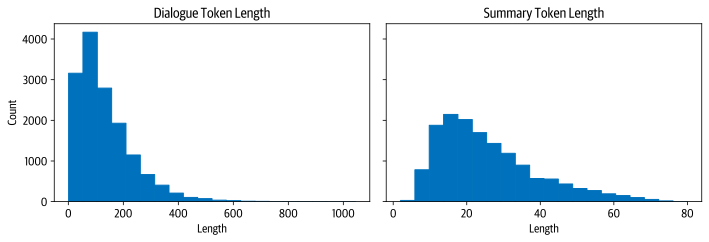

In [ ]:
d_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["dialogue"]]
s_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["summary"]]

fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0")
axes[0].set_title("Dialogue Token Length")
axes[0].set_xlabel("Length")
axes[0].set_ylabel("Count")
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0")
axes[1].set_title("Summary Token Length")
axes[1].set_xlabel("Length")
plt.tight_layout()
plt.show()

我们看到，大多数对话比CNN/DailyMail的文章短得多，每个对话有100-200个标记。同样，摘要也短得多，大约有20-40个符号（一条推文的平均长度）。

让我们在为训练者建立数据整理器时牢记这些意见。首先，我们需要对数据集进行标记。现在，我们将对话和摘要的最大长度分别设置为1024和128:

In [ ]:
#hide_output
def convert_examples_to_features(example_batch):
    input_encodings = tokenizer(example_batch["dialogue"], max_length=1024,
                                truncation=True)
    
    with tokenizer.as_target_tokenizer():
        target_encodings = tokenizer(example_batch["summary"], max_length=128,
                                     truncation=True)
    
    return {"input_ids": input_encodings["input_ids"],
            "attention_mask": input_encodings["attention_mask"],
            "labels": target_encodings["input_ids"]}

dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, 
                                       batched=True)
columns = ["input_ids", "labels", "attention_mask"]
dataset_samsum_pt.set_format(type="torch", columns=columns)

使用标记化步骤的一个新东西是tokenizer.as_target_tokenizer()上下文。有些模型在解码器输入中需要特殊的标记，所以区分编码器和解码器输入的标记很重要。在with语句（称为上下文管理器）中，标记器知道它正在为解码器进行标记，并可以相应地处理序列。

现在，我们需要创建数据整理器。这个函数在训练器中被调用，就在批处理被送入模型之前。在大多数情况下，我们可以使用默认的整理器，它从批次中收集所有的张量并简单地堆叠起来。对于文本摘要任务，我们不仅需要堆叠输入，还需要在解码器一侧准备目标。PEGASUS是一个编码器-解码器转化器，因此具有经典的seq2seq架构。在seq2seq设置中，一个常见的方法是在解码器中应用 "教师强制"。在这种策略下，解码器收到的输入标记（如GPT-2等纯解码器模型），除了编码器的输出外，还包括移一的标签；因此，在对下一个标记进行预测时，解码器得到移一的基础事实作为输入，如下表所示:

In [ ]:
#hide_input

#id teacher-forcing
#alt Decoder input and label alignemt for text generation.
#caption Decoder input and label alignemt for text generation.
text = ['PAD','Transformers', 'are', 'awesome', 'for', 'text', 'summarization']
rows = []
for i in range(len(text)-1):
    rows.append({'step': i+1, 'decoder_input': text[:i+1], 'label': text[i+1]})
pd.DataFrame(rows).set_index('step')

decoder_input          label
step                                                             
1                                            [PAD]   Transformers
2                              [PAD, Transformers]            are
3                         [PAD, Transformers, are]        awesome
4                [PAD, Transformers, are, awesome]            for
5           [PAD, Transformers, are, awesome, for]           text
6     [PAD, Transformers, are, awesome, for, text]  summarization

我们将其移位，使解码器只看到以前的地面真实标签，而不是现在或未来的标签。仅仅移位就足够了，因为解码器有掩蔽的自我注意力，可以掩蔽现在和未来的所有输入。

因此，当我们准备我们的批次时，我们通过将标签向右移动一个来设置解码器的输入。之后，我们确保标签中的填充标记被损失函数忽略，将它们设置为-100。不过，我们实际上不需要手动做这些，因为DataCollatorForSeq2Seq来拯救我们，为我们处理所有这些步骤:

In [ ]:
from transformers import DataCollatorForSeq2Seq

seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [ ]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=500,
    per_device_train_batch_size=1, per_device_eval_batch_size=1,
    weight_decay=0.01, logging_steps=10, push_to_hub=True,
    evaluation_strategy='steps', eval_steps=500, save_steps=1e6,
    gradient_accumulation_steps=16)

有一点与之前的设置不同，那就是新的参数，gradient_accumulation_steps。由于模型相当大，我们不得不将批次大小设置为1。然而，批次大小太小会损害收敛性。为了解决这个问题，我们可以使用一种叫做梯度累积的巧妙技术。顾名思义，我们不是一次性计算全部批次的梯度，而是做较小的批次，然后聚集梯度。当我们聚集了足够多的梯度，我们就运行优化步骤。当然，这比一次性完成要慢一些，但它为我们节省了大量的GPU内存。

现在让我们确保我们已经登录到Hugging Face，这样我们就可以在训练后将模型推送到Hub:

In [ ]:
#hide_output
from huggingface_hub import notebook_login

notebook_login()

现在我们已经有了初始化训练器所需的一切，包括模型、标记器、训练参数和数据整理器，以及训练和评估集:

In [ ]:
# hide_output
trainer = Trainer(model=model, args=training_args,
                  tokenizer=tokenizer, data_collator=seq2seq_data_collator,
                  train_dataset=dataset_samsum_pt["train"], 
                  eval_dataset=dataset_samsum_pt["validation"])

我们已经准备好进行训练了。训练结束后，我们可以直接在测试集上运行评估函数，看看模型的表现如何:

In [ ]:
# hide_output
trainer.train()
score = evaluate_summaries_pegasus(
    dataset_samsum["test"], rouge_metric, trainer.model, tokenizer,
    batch_size=2, column_text="dialogue", column_summary="summary")

rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
pd.DataFrame(rouge_dict, index=[f"pegasus"])

In [ ]:
# hide_input
pd.DataFrame(rouge_dict, index=[f"pegasus"])

rouge1    rouge2    rougeL  rougeLsum
pegasus  0.427614  0.200571  0.340648   0.340738

我们看到，ROUGE的分数比没有微调的模型有了很大的提高，所以即使之前的模型也是为文本摘要而训练的，但它并没有很好地适应新的领域。让我们把我们的模型推到Hub上:

In [ ]:
# hide_output
trainer.push_to_hub("Training complete!")

Saving model checkpoint to pegasus-samsum-test
Configuration saved in pegasus-samsum-test/config.json
Model weights saved in pegasus-samsum-test/pytorch_model.bin
tokenizer config file saved in pegasus-samsum-test/tokenizer_config.json
Special tokens file saved in pegasus-samsum-test/special_tokens_map.json
Dropping the following result as it does not have all the necessary field:
{'task': {'name': 'Sequence-to-sequence Language Modeling', 'type': 'text2text-generation'}, 'dataset': {'name': 'samsum', 'type': 'samsum', 'args': 'samsum'}}


'https://huggingface.co/lvwerra/pegasus-samsum-test/commit/236684ab026115ad5b9eb61f6ddbdaf3f07bddf8'

### 生成对话摘要
从损失和ROUGE分数来看，该模型似乎比只在CNN/DailyMail上训练的原始模型有明显的改进。让我们看看在测试集的一个样本上产生的文本摘要是什么样子的：

In [ ]:
# hide
import transformers
transformers.logging.set_verbosity_error()

In [ ]:
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length": 128}
sample_text = dataset_samsum["test"][0]["dialogue"]
reference = dataset_samsum["test"][0]["summary"]
pipe = pipeline("summarization", model="transformersbook/pegasus-samsum")

print("Dialogue:")
print(sample_text)
print("\nReference Summary:")
print(reference)
print("\nModel Summary:")
print(pipe(sample_text, **gen_kwargs)[0]["summary_text"])

Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Reference Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact
Larry.

Model Summary:
Amanda can't find Betty's number. Larry called Betty last time they were at the
park together. Hannah wants Amanda to text Larry instead of calling Betty.


这看起来更像参考文献的摘要。似乎该模型已经学会了将对话综合成一个摘要，而不只是提取段落。现在，最终的测试：该模型在自定义输入上的效果如何？

In [ ]:
custom_dialogue = """\
Thom: Hi guys, have you heard of transformers?
Lewis: Yes, I used them recently!
Leandro: Indeed, there is a great library by Hugging Face.
Thom: I know, I helped build it ;)
Lewis: Cool, maybe we should write a book about it. What do you think?
Leandro: Great idea, how hard can it be?!
Thom: I am in!
Lewis: Awesome, let's do it together!
"""
print(pipe(custom_dialogue, **gen_kwargs)[0]["summary_text"])

Thom, Lewis and Leandro are going to write a book about transformers. Thom
helped build a library by Hugging Face. They are going to do it together.


生成的自定义对话的摘要是有意义的。它很好地总结了讨论中所有的人都想一起写书，而不是简单地提取单句。例如，它将第三和第四句话综合成一个逻辑组合。